# Library

In [2]:
import pandas as pd
import numpy as np
import math
import operator
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset

In [3]:
dataset = pd.read_csv('FuelConsumptionCo2.csv')

In [4]:
df = pd.DataFrame(dataset)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.shape

(1067, 13)

In [6]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


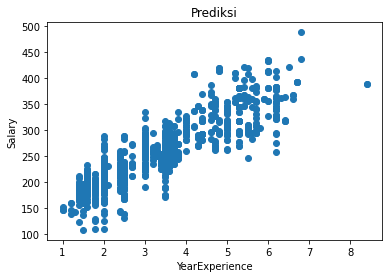

In [8]:
plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'])
plt.title('Prediksi')
plt.xlabel('YearExperience')
plt.ylabel('Salary')
plt.show()

In [9]:
x = df['ENGINESIZE'].values
y = df['CO2EMISSIONS'].values

# Linear Regression

## Persamaan Simple Linear Regression

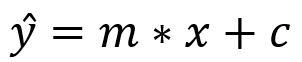

## Persamaan slope/gradien(m) dan intercept(c)

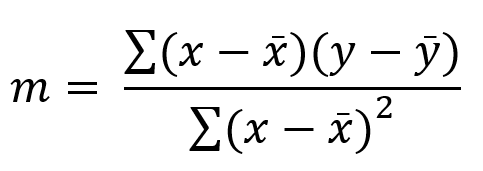

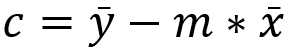

In [9]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [16]:
num = (x-mean_x)*(y-mean_y)
denom = (x-mean_x)**2

m = np.sum(num)/np.sum(denom)
c = mean_y - (m * mean_x)

print(f'Nilai m = {m}')
print(f'Nilai c = {c}')

Nilai m = 39.12519978671174
Nilai c = 125.30409949535684


# Persamaan MSE

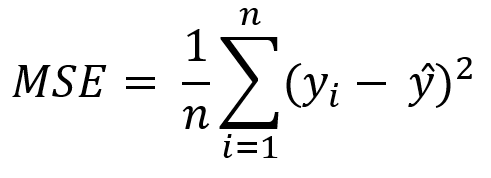

In [17]:
y_pred = m*x+c

In [18]:
Min = (y_pred-y)**2
Sum_MSE=np.sum(Min)
MSE = 1/len(x)*Sum_MSE
print(f'Nilai MSE = {MSE}')

Nilai MSE = 946.314052718875


## Persamaan R-Square

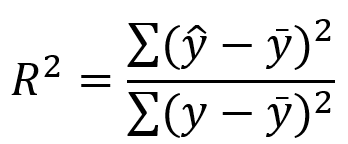

In [19]:
RSS = (y_pred - mean_y) ** 2
RSS = np.sum(RSS)

In [20]:
TSS = (y - mean_y) ** 2
TSS = np.sum(TSS)

In [21]:
r_square = RSS/TSS
print(f'Nilai R-Square = {r_square}')

Nilai R-Square = 0.7641458597854814


# Plot

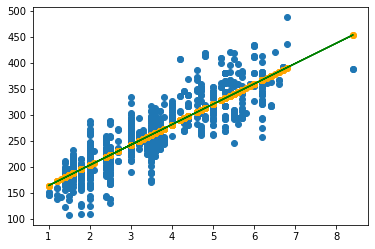

In [22]:
fig, ax = plt.subplots()

y_reg = x *m + c
ax.scatter(x, y)
ax.scatter(x, y_pred, color="orange")
ax.plot(x, y_reg, color="green")

# Gradient Descent (Optimasi)
Pada gradient descent, dilakukan training untuk mendapatkan nilai m (bobot) dan nilai c(bias) yang baru

In [10]:
# Inisialisasi m = 0 dan c = 0
m_gd = 0
c_gd = 0

# Menghitung Rata-rata kedua data
mean_x = np.mean(x)
mean_y = np.mean(y)

# HyperParameter
L = 0.01  
epochs = 600  

# Panjang data x
n = len(x) 

# Training (Gradient Descent)
for i in range(epochs): 
    Y_pred = m_gd*x + c_gd  # y_pred
    D_mgd = (-2/n) * sum(x * (y - Y_pred))  # m baru
    D_cgd = (-2/n) * sum(y - Y_pred)  # c baru
    m_gd = m_gd - L * D_mgd  # Update m
    c_gd = c_gd - L * D_cgd  # Update c
    
    #MSE
    Min = (Y_pred-y)**2
    Sum_MSE=np.sum(Min)
    MSE = 1/len(x)*Sum_MSE
    

    print(f'Epoch {i+1} ----> m = {m_gd} -- c = {c_gd} -- MSE = {MSE}')

Epoch 1 ----> m = 18.715611996251166 -- c = 5.124573570759138 -- MSE = 69665.42080599813
Epoch 2 ----> m = 32.14711440731104 -- c = 8.894095358338998 -- MSE = 37303.85250322384
Epoch 3 ----> m = 41.78026270501759 -- c = 11.689310508504843 -- MSE = 20576.910977143194
Epoch 4 ----> m = 48.683073637001264 -- c = 13.78391365188179 -- MSE = 11928.838893137994
Epoch 5 ----> m = 53.62327764143585 -- c = 15.37464747967053 -- MSE = 7455.368324389956
Epoch 6 ----> m = 57.15274806122747 -- c = 16.602938732162464 -- MSE = 5139.056421219619
Epoch 7 ----> m = 59.66819203933401 -- c = 17.570450961219073 -- MSE = 3937.4347829130475
Epoch 8 ----> m = 61.45477741746309 -- c = 18.35026444103045 -- MSE = 3311.8311414502873
Epoch 9 ----> m = 62.71749339206498 -- c = 18.994912708553763 -- MSE = 2983.8985573330056
Epoch 10 ----> m = 63.603693733622094 -- c = 19.54215953111431 -- MSE = 2809.8073540635705
Epoch 11 ----> m = 64.21930170073132 -- c = 20.01915160804783 -- MSE = 2715.236628094346
Epoch 12 ----> m 

In [11]:
#R-Square
RSS = (Y_pred - mean_y) ** 2
RSS = np.sum(RSS)
TSS = (y - mean_y) ** 2
TSS = np.sum(TSS)
r_square = RSS/TSS
print(f'Nilai R-Square = {r_square}')

Nilai R-Square = 0.974646150991562


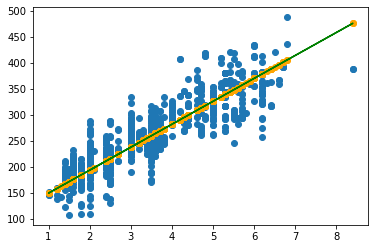

In [13]:
fig, ax = plt.subplots()

Y_reg = x *m_gd + c_gd
ax.scatter(x, y)
ax.scatter(x, Y_pred, color="orange")
ax.plot(x, Y_reg, color="green")

# Simple Deployment

In [23]:
pengalaman_kerja = float(input('Ukuran Engine? '))

prediksi =  m*pengalaman_kerja+c
prediksi

Ukuran Engine? 2.0


203.55449906878033

In [24]:
pengalaman_kerja_gd = float(input('Ukuran Engine? '))

prediksi_gd =  m_gd*pengalaman_kerja_gd+c_gd
prediksi_gd



Ukuran Engine? 2.0


194.03701896471387

Prediksi dengan variabel yang di optimasi lebih mendekati dengan nilai aslinya dibandingkan dengan yang tidak di optimasi